## EDA
**Author:** Vedika Garg

## Table of Contents
#### [1. Introduction](#1.Introduction)
#### [2. Importing the Libraries](#2.Importing)
#### [3. Description of the data](#3.Description): &nbsp;[3.1 Reading the Data](#3.1Reading) &nbsp;[3.2 Summary of the Train Dataset](#3.2Summary) &nbsp;[3.3 Information about application_test.csv](#3.3Info)
#### [4. Exploring the Target Variable](#4.Exp): &nbsp;[4.1 Accuracy of majority class classifier](#4.1Acc)
#### [5. Explore the relationship between target and predictors](#5.ExpR): &nbsp;[5.1 Exploring the Categorical Variables](#5.1Cat) &nbsp;[5.2 Exploring the Numerical Variables](#5.2Num) <br><br>[5.3 Correlation Analysis](#5.3Corr)
#### [6. Explore the scope of missing data](#6.Scope) &nbsp; [6.1 Imputing the missing values](#6.1Imp) &nbsp;[6.2 Dropping the missing values](#6.2Miss)
#### [7. Variance](#7.Var)
#### [8. Outliers](#8.Out)
#### [9. Will the input data need to be transformed in order to be used in a model](#9.Will)
#### [10. Joining application_train.csv with a transactional data](#10.Join)
#### [11. Exploring the joined transactional data](#11.TransData)
#### [12. Results](#12.Results)

## Introduction <a id = '1.Introduction'></a>

Home Credit strives to identify the unbanked population that despite being capable of repaying loans struggle to receive them due to the lack of traditional credit history. Their current system has its limitations that might result in the rejection of a potential borrower capable of repayment. We aim to use data analysis techniques to identify the population capable of repayment. 
This will ensure that people capable of repayment are not being rejected.

## Importing the Libraries <a id = '2.Importing'></a>

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Description of the data <a id = '3.Description'></a>

We have 8 data files in total, in this notebook we will be particularly exploring the **application_train.csv** and **application_test.csv** file. The other files and their description are listed below:
<br>**bureau.csv**: consists of the information about the clients credit provided by institutes they previously took their loan from. 
<br>**bureau_balance.csv**: consists of the monthly balances listed in bureau.csv
<br>**POS_CASH_balance.csv**: consists of the monthly balance of POS and cash loans the clients had 
<br>**credit_card_balance.csv**: consists of the monthly balances of previous credit card the clients had
<br>**previous_application.csv**: consists of the previous applications for Home credit loans made by clients
<br>**installments_payments.csv**: consists of the repayment history for previously disbursed clients

### Reading the Data <a id = 3.1Reading></a>

In [2]:
#reading application_train.csv file
train_df = pd.read_csv('application_train.csv')

In [3]:
train_df.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### Summary of the Train Dataset <a id = 3.2Summary></a>

In [4]:
#shape of the train dataset
train_df.shape

(307511, 122)

In [5]:
#train dataset summary
train_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [6]:
#information about application_train.csv
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


### Information about application_test.csv <a id = '3.3Info'></a>

In [7]:
#reading the application_test.csv file and listing its information
test_df = pd.read_csv('application_test.csv')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


The application_train.csv consists of 307511 rows and 122 columns. The application_test.csv consists of 48744 rows and 121 columns. Except the TARGET column, both of the files have the same columns

## Exploring the Target Variable <a id = '4.Exp'></a>

In [8]:
#calculating the number of the TARGET variables that are 0 or 1 using value_counts()
majority = train_df['TARGET'].value_counts()
majority_count = pd.DataFrame({'Labels': majority.index,
                               'Values': majority.values})
majority_count.set_index('Labels', inplace = True)
majority_count

,Values
Labels,
0,282686
1,24825


The above table shows that TARGET = 0 is the majority class. The Target variable is a binary variable where 0 indicates no loan default and 1 indicates loan default.

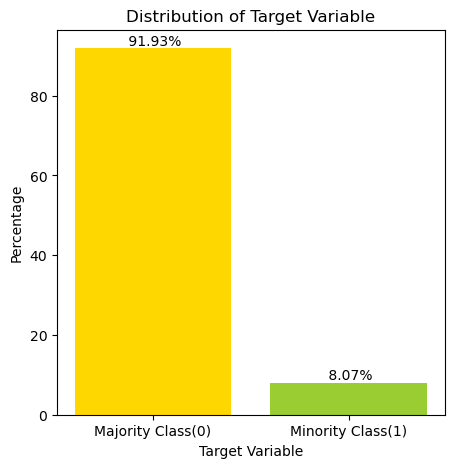

In [9]:
#calculating the percentage of 0 and 1 in TARGET
total = majority_count['Values'].sum()
percentage = majority_count['Values'] / total * 100

#storing the index as labels
labels = majority_count.index

#plotting the Distribution of the TARGET variable
plt.figure(figsize = (5,5))
bars = plt.bar(labels, percentage, color = ['gold', 'yellowgreen'])
plt.xlabel('Target Variable')
plt.ylabel('Percentage')
plt.xticks(labels,['Majority Class(0)', 'Minority Class(1)'])

#to print the data labels on top of the bars
for bar, percent in zip(bars, percentage):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
            f'{percent: .2f}%', ha = 'center', va = 'bottom')

plt.title('Distribution of Target Variable')
plt.show()

As we can see in the above plot the data is highly **unbalanced**. This can be attributed to the fact that the data is skewed.

### Accuracy of majority class classifier <a id = '4.1Acc'></a>

In [10]:
# accuracy of a simple model consisting in a majority class classifier would be:
accuracy = max(percentage)
print(round(accuracy,2),"%")

91.93 %


## Explore the relationship between target and predictors <a id ='5.ExpR'></a>

### Exploring the Categorical Variables <a id = '5.1Cat'></a>

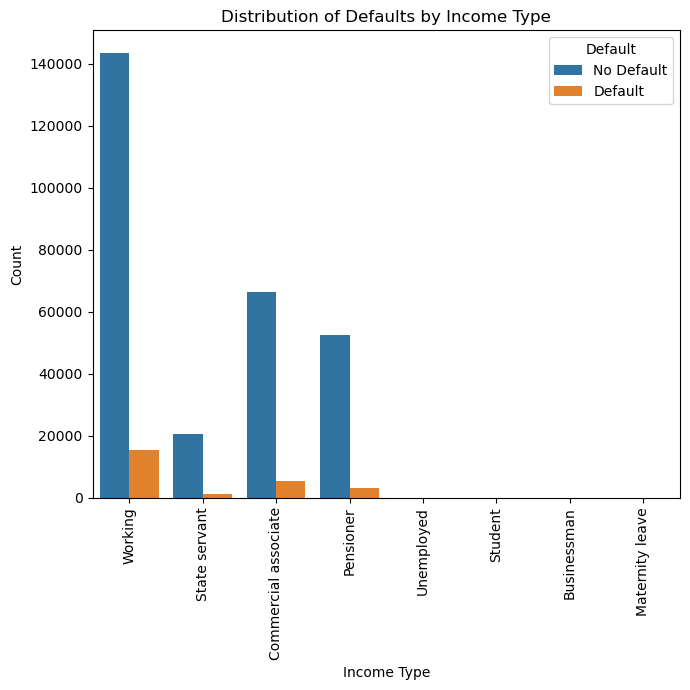

In [11]:
#plotting the Distribution of Defaults by income type
plt.figure(figsize=(7, 7))
sns.countplot(x = 'NAME_INCOME_TYPE', hue = 'TARGET', data = train_df)
plt.title('Distribution of Defaults by Income Type')
plt.xticks(rotation=90)
plt.xlabel('Income Type')
plt.ylabel('Count')
plt.legend(title = 'Default', labels = ['No Default', 'Default'])
plt.tight_layout()
plt.show()

Based on the above plot we can see that people in working class have the highest percentage of loan defaults

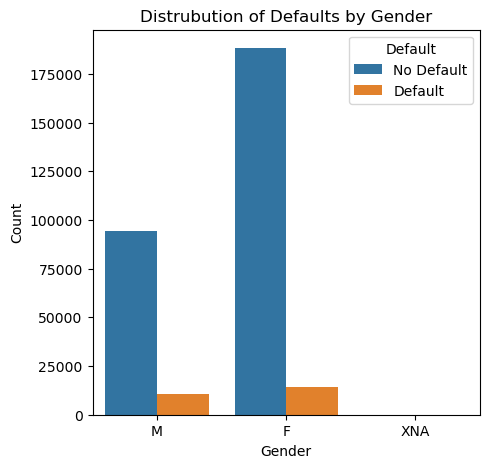

In [12]:
#plotting the Distribution of Defaults by gender
plt.figure(figsize = (5,5))
sns.countplot(x = 'CODE_GENDER', hue = 'TARGET', data = train_df)
plt.title('Distrubution of Defaults by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title = 'Default', labels = ['No Default', 'Default'])
plt.show()

Based on the above plot we notice that the percentage of male candidates that are likely to default out of the total is higher as compared to that of the female candidates  

### Exploring the Numerical Variables <a id = '5.2Num'></a>

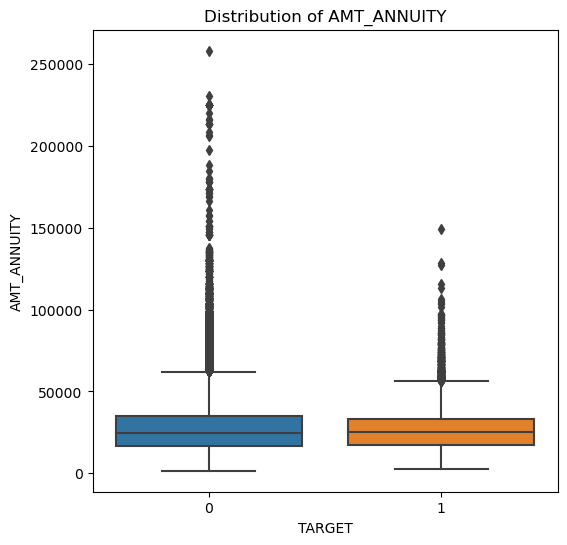

In [13]:
#plotting the Distribution of AMT_ANNUITY
plt.figure(figsize = (6,6))
sns.boxplot(x = 'TARGET', y = 'AMT_ANNUITY', data = train_df)
plt.title('Distribution of AMT_ANNUITY')
plt.xlabel('TARGET')
plt.ylabel('AMT_ANNUITY')
plt.show()

Amt_Annuity observes more outliers when TARGET = 0 as opposed to TARGET = 1

C:\Users\Harish\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x1000 with 0 Axes>

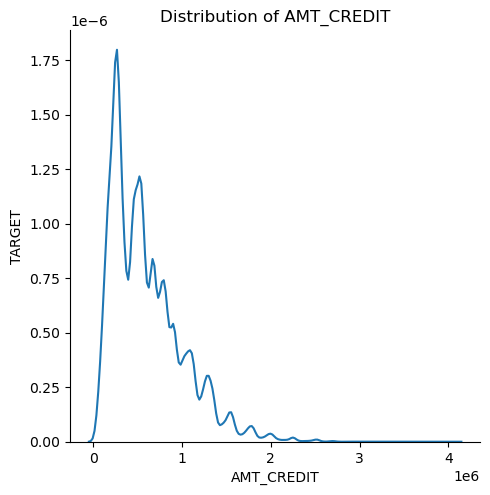

In [14]:
#plotting the Distribution of AMT_CREDIT
plt.figure(figsize = (10,10))
sns.displot(x = 'AMT_CREDIT', data = train_df, kind = 'kde')
plt.title('Distribution of AMT_CREDIT')
plt.xlabel('AMT_CREDIT')
plt.ylabel('TARGET')
plt.show()

### Correlation Analysis  <a id = '5.3Corr'></a>

In [15]:
#performing the correlation analysis for numeric data using corr()
numeric = train_df.select_dtypes(include = [np.number]).columns
correlations = train_df[numeric].corr()['TARGET'].sort_values()
print("Most positive correlations:\n", correlations.tail(10))
print("Most negative correlations:\n", correlations.head(10))

Most positive correlations:
 FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64
Most negative correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64


This correlation analysis tell us that which numerical variables are more strongly correlated to the target variable. With Days_Birth having the strongest positive correlation and Ext_Source3 with a negative correlation.

## Explore the scope of missing data <a id = '6.Scope'></a>

In [16]:
#counting the missing values and listing its percentage
missing_count = train_df.isnull().sum()
missing_percentage = round((train_df.isnull().mean() * 100), 2)

#creating a dataframe to store the same
missing_table = pd.DataFrame({'Missing Values': missing_count, 'Percentage': missing_percentage})
missing_table = missing_table.sort_values('Missing Values', ascending = False)

#printing the head of the missing table
print(missing_table.head(60))

                              Missing Values  Percentage
COMMONAREA_MEDI                       214865       69.87
COMMONAREA_AVG                        214865       69.87
COMMONAREA_MODE                       214865       69.87
NONLIVINGAPARTMENTS_MODE              213514       69.43
NONLIVINGAPARTMENTS_AVG               213514       69.43
NONLIVINGAPARTMENTS_MEDI              213514       69.43
FONDKAPREMONT_MODE                    210295       68.39
LIVINGAPARTMENTS_MODE                 210199       68.35
LIVINGAPARTMENTS_AVG                  210199       68.35
LIVINGAPARTMENTS_MEDI                 210199       68.35
FLOORSMIN_AVG                         208642       67.85
FLOORSMIN_MODE                        208642       67.85
FLOORSMIN_MEDI                        208642       67.85
YEARS_BUILD_MEDI                      204488       66.50
YEARS_BUILD_MODE                      204488       66.50
YEARS_BUILD_AVG                       204488       66.50
OWN_CAR_AGE                    

In [17]:
#printing the tail of the missing values
print(missing_table.tail(60))

                             Missing Values  Percentage
EXT_SOURCE_2                            660        0.21
AMT_GOODS_PRICE                         278        0.09
AMT_ANNUITY                              12        0.00
CNT_FAM_MEMBERS                           2        0.00
DAYS_LAST_PHONE_CHANGE                    1        0.00
CNT_CHILDREN                              0        0.00
FLAG_DOCUMENT_8                           0        0.00
NAME_CONTRACT_TYPE                        0        0.00
CODE_GENDER                               0        0.00
FLAG_OWN_CAR                              0        0.00
FLAG_DOCUMENT_2                           0        0.00
FLAG_DOCUMENT_3                           0        0.00
FLAG_DOCUMENT_4                           0        0.00
FLAG_DOCUMENT_5                           0        0.00
FLAG_DOCUMENT_6                           0        0.00
FLAG_DOCUMENT_7                           0        0.00
FLAG_DOCUMENT_9                           0     

The columns with more than 50% of missing values can be the cause of noise and thus can be dropped. Since the column 'OWN_CAR_AGE' has a mildly better correlation with the target variable we impute it instead of dropping it.

### Imputing the missing values <a id = '6.1Imp'></a>

In [18]:
#imputing the na's in OWN_CAR_AGE' with 0
train_df['OWN_CAR_AGE'] = train_df['OWN_CAR_AGE'].fillna(0)

#creating a new column 'OWN_CAR_AGE_BINS' with bins to understand the former better
bin_class = [-float('inf'), 0, 10, float('inf')]
bin_labels = ['0','0-10', '>10']
train_df['OWN_CAR_AGE_BINS'] = pd.cut(train_df['OWN_CAR_AGE'], bins = bin_class, labels = bin_labels)
train_df[['OWN_CAR_AGE_BINS', 'OWN_CAR_AGE']].head(10)

,OWN_CAR_AGE_BINS,OWN_CAR_AGE
0,0,0.0
1,0,0.0
2,>10,26.0
3,0,0.0
4,0,0.0
5,0,0.0
6,>10,17.0
7,0-10,8.0
8,0,0.0
9,0,0.0


### Dropping the missing values <a id = '6.2Miss'></a>

In [19]:
#dropping the columns with more than 50% missing values except for 'OWN_CAR_AGE'
columns_drop = missing_percentage[missing_percentage > 50].index
columns_drop = [col for col in columns_drop if col != 'OWN_CAR_AGE']
train_df_new = train_df.drop(columns=columns_drop)

In [20]:
train_df_new.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,OWN_CAR_AGE_BINS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,>10
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0


## Variance <a id = '7.Var'></a>

In [21]:
#calculating the variance of all the columns
variance = train_df_new.var(numeric_only = True)
print(variance)

SK_ID_CURR                    1.056582e+10
TARGET                        7.421192e-02
CNT_CHILDREN                  5.214593e-01
AMT_INCOME_TOTAL              5.622739e+10
AMT_CREDIT                    1.619988e+11
                                  ...     
AMT_REQ_CREDIT_BUREAU_DAY     1.226720e-02
AMT_REQ_CREDIT_BUREAU_WEEK    4.189590e-02
AMT_REQ_CREDIT_BUREAU_MON     8.390604e-01
AMT_REQ_CREDIT_BUREAU_QRT     6.305244e-01
AMT_REQ_CREDIT_BUREAU_YEAR    3.494264e+00
Length: 69, dtype: float64


In [22]:
#the columns with near zero variance can be identified using variance < 0.001
near_zero_variance = variance[variance < 0.001].index
print(near_zero_variance)

Index(['REGION_POPULATION_RELATIVE', 'FLAG_MOBIL', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'],
      dtype='object')


In [23]:
#the columns with zero variance can be identified using variance == 0 
zero_variance = variance[variance == 0].index
print(zero_variance)

Index([], dtype='object')


Variance measure the spread of the values in the dataset. Zero variance and near zero variance columns may not provide useful information for prediction and thus can be removed in the future if desired. We have 11 columns with near zero variance and no columns with zero variance.

## Outliers <a id = '8.Out'></a>

In [24]:
from tabulate import tabulate

#calculating the outliers using 3 as a threshold
outliers = {}
for col in train_df_new:
    if train_df_new[col].dtype in ['int64', 'float64']:
        mean = train_df_new[col].mean()
        std = train_df_new[col].std()
        outliers[col] = ((train_df_new[col] - mean).abs() > 3 * std).sum()
    else:
        outliers[col] = 'N/A'
table_df = [[key, value] for key, value in outliers.items()]

#using tabulate library to print the outliers in a tabular format
print(tabulate(table_df, headers = ["Columns", "Outliers"]))

Columns                       Outliers
----------------------------  ----------
SK_ID_CURR                    0
TARGET                        24825
NAME_CONTRACT_TYPE            N/A
CODE_GENDER                   N/A
FLAG_OWN_CAR                  N/A
FLAG_OWN_REALTY               N/A
CNT_CHILDREN                  4272
AMT_INCOME_TOTAL              454
AMT_CREDIT                    3255
AMT_ANNUITY                   2959
AMT_GOODS_PRICE               4173
NAME_TYPE_SUITE               N/A
NAME_INCOME_TYPE              N/A
NAME_EDUCATION_TYPE           N/A
NAME_FAMILY_STATUS            N/A
NAME_HOUSING_TYPE             N/A
REGION_POPULATION_RELATIVE    8412
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_REGISTRATION             749
DAYS_ID_PUBLISH               0
OWN_CAR_AGE                   4665
FLAG_MOBIL                    1
FLAG_EMP_PHONE                0
FLAG_WORK_PHONE               0
FLAG_CONT_MOBILE              574
FLAG_PHONE                    0
FLAG_EMAIL

The above table provides a list of outliers present in each numerical column. We can later decide how to deal with these outliers.

## Will the input data need to be transformed in order to be used in a model <a id = '9.Will'></a>

In [25]:
#identifying the categorical variables
categorical = train_df_new.select_dtypes(include = ['object', 'category']).columns.tolist()
print(categorical)

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'EMERGENCYSTATE_MODE', 'OWN_CAR_AGE_BINS']


The above listed categorical variables can easily be converted to factors. Doing so will make it easy for the model to understand the categorical variables better. 

## Joining application_train.csv with a transactional data <a id = '10.Join'></a>

In [26]:
#identifying the common columns in application_train.csv and previous_application.csv
previous = pd.read_csv('previous_application.csv')
common_col = list(set(previous.columns) & set(train_df.columns))
print("Common Columns")
for col in common_col:
    print(col)

Common Columns
SK_ID_CURR
WEEKDAY_APPR_PROCESS_START
NAME_CONTRACT_TYPE
AMT_GOODS_PRICE
AMT_ANNUITY
AMT_CREDIT
NAME_TYPE_SUITE
HOUR_APPR_PROCESS_START


In [27]:
#merging the two datasets using the common column "SK_ID_CURR"
train_merged = pd.merge(train_df, previous, on = 'SK_ID_CURR')
train_merged.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


## Exploring the joined transactional data <a id = '11.TransData'></a>

In [28]:
#calculating the correlation of the numeric variables in the merged dataset
numeric_col = train_merged.select_dtypes(include=['int64', 'float64'])
merge_correlation = numeric_col.corr()
corr_target = merge_correlation['TARGET'].sort_values(ascending = False)

In [29]:
corr_target.sort_values().head(30)

EXT_SOURCE_3                 -0.188187
EXT_SOURCE_2                 -0.155026
EXT_SOURCE_1                 -0.153307
DAYS_EMPLOYED                -0.047804
FLOORSMAX_AVG                -0.041363
FLOORSMAX_MEDI               -0.040918
FLOORSMAX_MODE               -0.040450
REGION_POPULATION_RELATIVE   -0.035028
ELEVATORS_AVG                -0.032858
ELEVATORS_MEDI               -0.032648
AMT_GOODS_PRICE_x            -0.032568
LIVINGAREA_AVG               -0.032230
FLAG_DOCUMENT_6              -0.032212
FLOORSMIN_AVG                -0.032099
LIVINGAREA_MEDI              -0.031998
TOTALAREA_MODE               -0.031925
FLOORSMIN_MEDI               -0.031713
FLOORSMIN_MODE               -0.031210
DAYS_FIRST_DRAWING           -0.031154
ELEVATORS_MODE               -0.031021
LIVINGAREA_MODE              -0.030219
APARTMENTS_AVG               -0.028532
APARTMENTS_MEDI              -0.028386
HOUR_APPR_PROCESS_START_y    -0.027809
APARTMENTS_MODE              -0.026159
RATE_DOWN_PAYMENT        

In [30]:
correlations.sort_values().head(30)

EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
ELEVATORS_MEDI               -0.033863
FLOORSMIN_AVG                -0.033614
FLOORSMIN_MEDI               -0.033394
LIVINGAREA_AVG               -0.032997
LIVINGAREA_MEDI              -0.032739
FLOORSMIN_MODE               -0.032698
TOTALAREA_MODE               -0.032596
ELEVATORS_MODE               -0.032131
LIVINGAREA_MODE              -0.030685
AMT_CREDIT                   -0.030369
APARTMENTS_AVG               -0.029498
APARTMENTS_MEDI              -0.029184
FLAG_DOCUMENT_6              -0.028602
APARTMENTS_MODE              -0.027284
LIVINGAPARTMENTS_AVG         -0.025031
LIVINGAPARTMENTS_MEDI    

We notice that the correlations of the columns are slightly changed after merging the two datasets.

## Results <a id = '12.Results'></a>

The EDA revealed the following key insights:
- Majority of clients have no loan default. There is a class unbalance issue here. 
- We have a huge number of potential predictors but not all of them are necessary for building the model. We might have to manipulate certain columns for them to be used. 
- We have analysed certain columns and realized that columns like income types and amt_credit can serve as good predictors. 
- Correlation matrix of numeric variables indicates that the columns like Days_Birth and Ext_Source3 have great correlations with target variable. This means that these columns can also be used as potentially good predictors.
- Categorical variables can be converted to factors for better model training.
- Ouliers, Missing Values and Variance help us understand which columns need to be imputed or dropped.
- Integrating the transcational data with application_csv gives us a better understanding of client behaviour. This will help us improve our model performance.